# Name- Manisha Chouhan 
## Task6- Prediction Using Decision Tree Algorithm

### Importing Required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
df=pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df.rename(columns={'SepalLengthCm':'Sepal_Length','SepalWidthCm':'Sepal_Width','PetalLengthCm':'Petal_Length','PetalWidthCm':'Petal_width','Species':'species'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   Sepal_Length  150 non-null    float64
 2   Sepal_Width   150 non-null    float64
 3   Petal_Length  150 non-null    float64
 4   Petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking missing values

In [8]:
df.isna().sum()

Id              0
Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_width     0
species         0
dtype: int64

In [9]:
df.describe()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.corr()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
Sepal_Length,0.716676,1.000000,-0.109369,0.871754,0.817954
Sepal_Width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
Petal_Length,0.882747,0.871754,-0.420516,1.000000,0.962757
Petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


In [11]:
df.shape

(150, 6)

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['label_species']=le.fit_transform(df['species'])

In [13]:
df.head()

,Id,Sepal_Length,Sepal_Width,Petal_Length,Petal_width,species,label_species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


### Visualization

<AxesSubplot:>

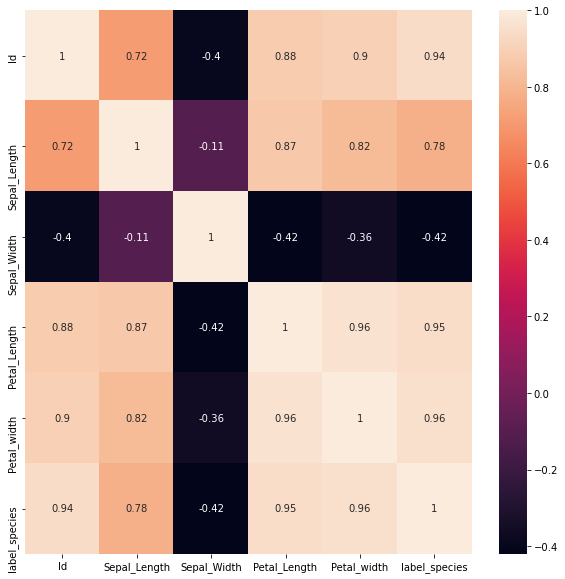

In [14]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

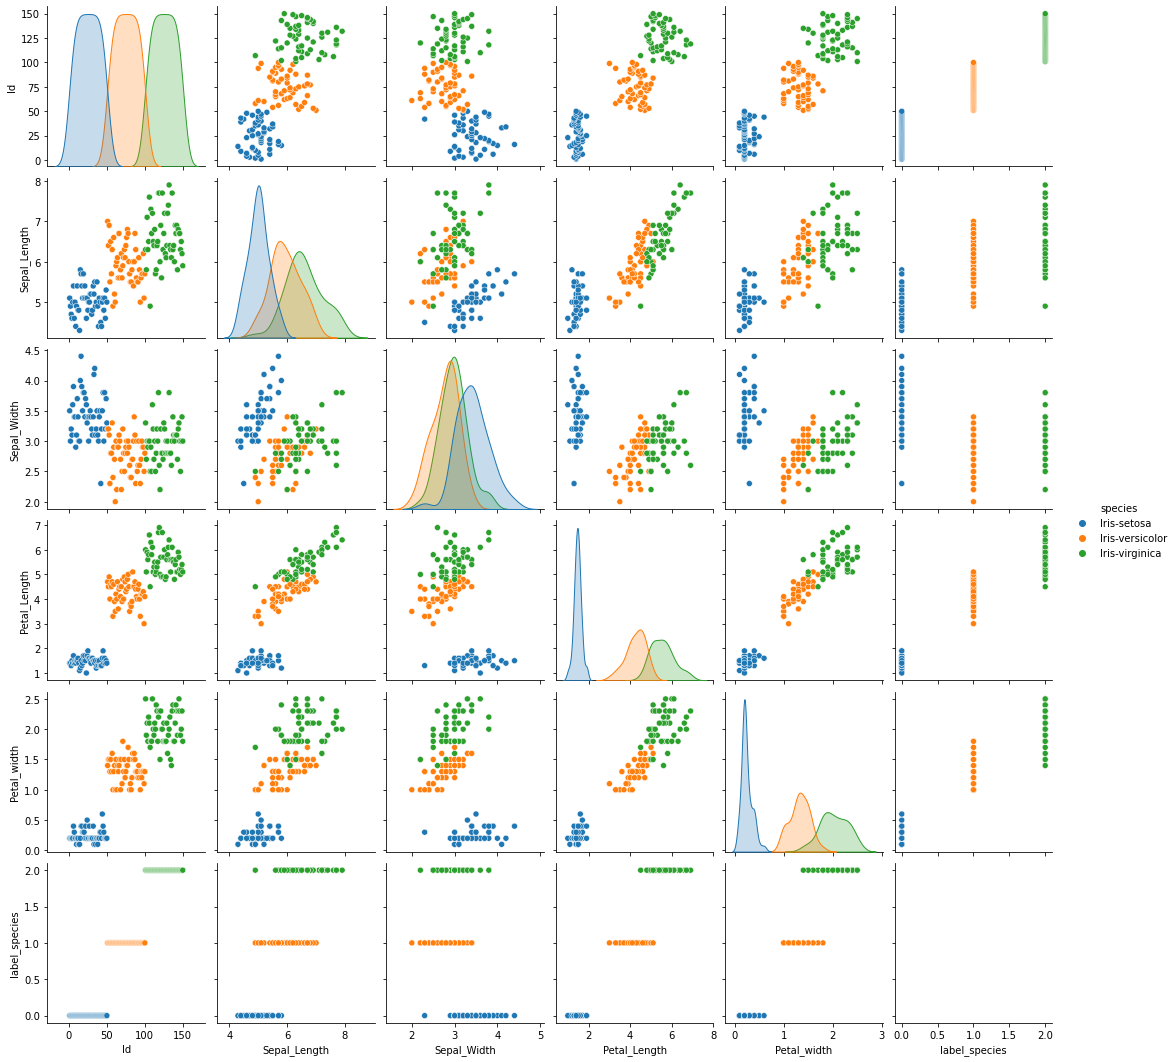

In [15]:
sns.pairplot(data=df, hue='species')

### Preparation of data for training

In [16]:
x=df.drop(columns=['species','label_species'])
y=df['label_species']

### Train test Split 

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2, random_state=0)

### Training and Predicting the model

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

### Visualising Decision Tree

[Text(1004.4000000000001, 1132.5, 'X[0] <= 101.0\ngini = 0.6649\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(669.6, 679.5, 'X[4] <= 0.8\ngini = 0.4997\nsamples = 76\nvalue = [39, 37, 0]'),
 Text(334.8, 226.5, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(1004.4000000000001, 226.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(1339.2, 679.5, 'gini = 0.0\nsamples = 44\nvalue = [0, 0, 44]')]

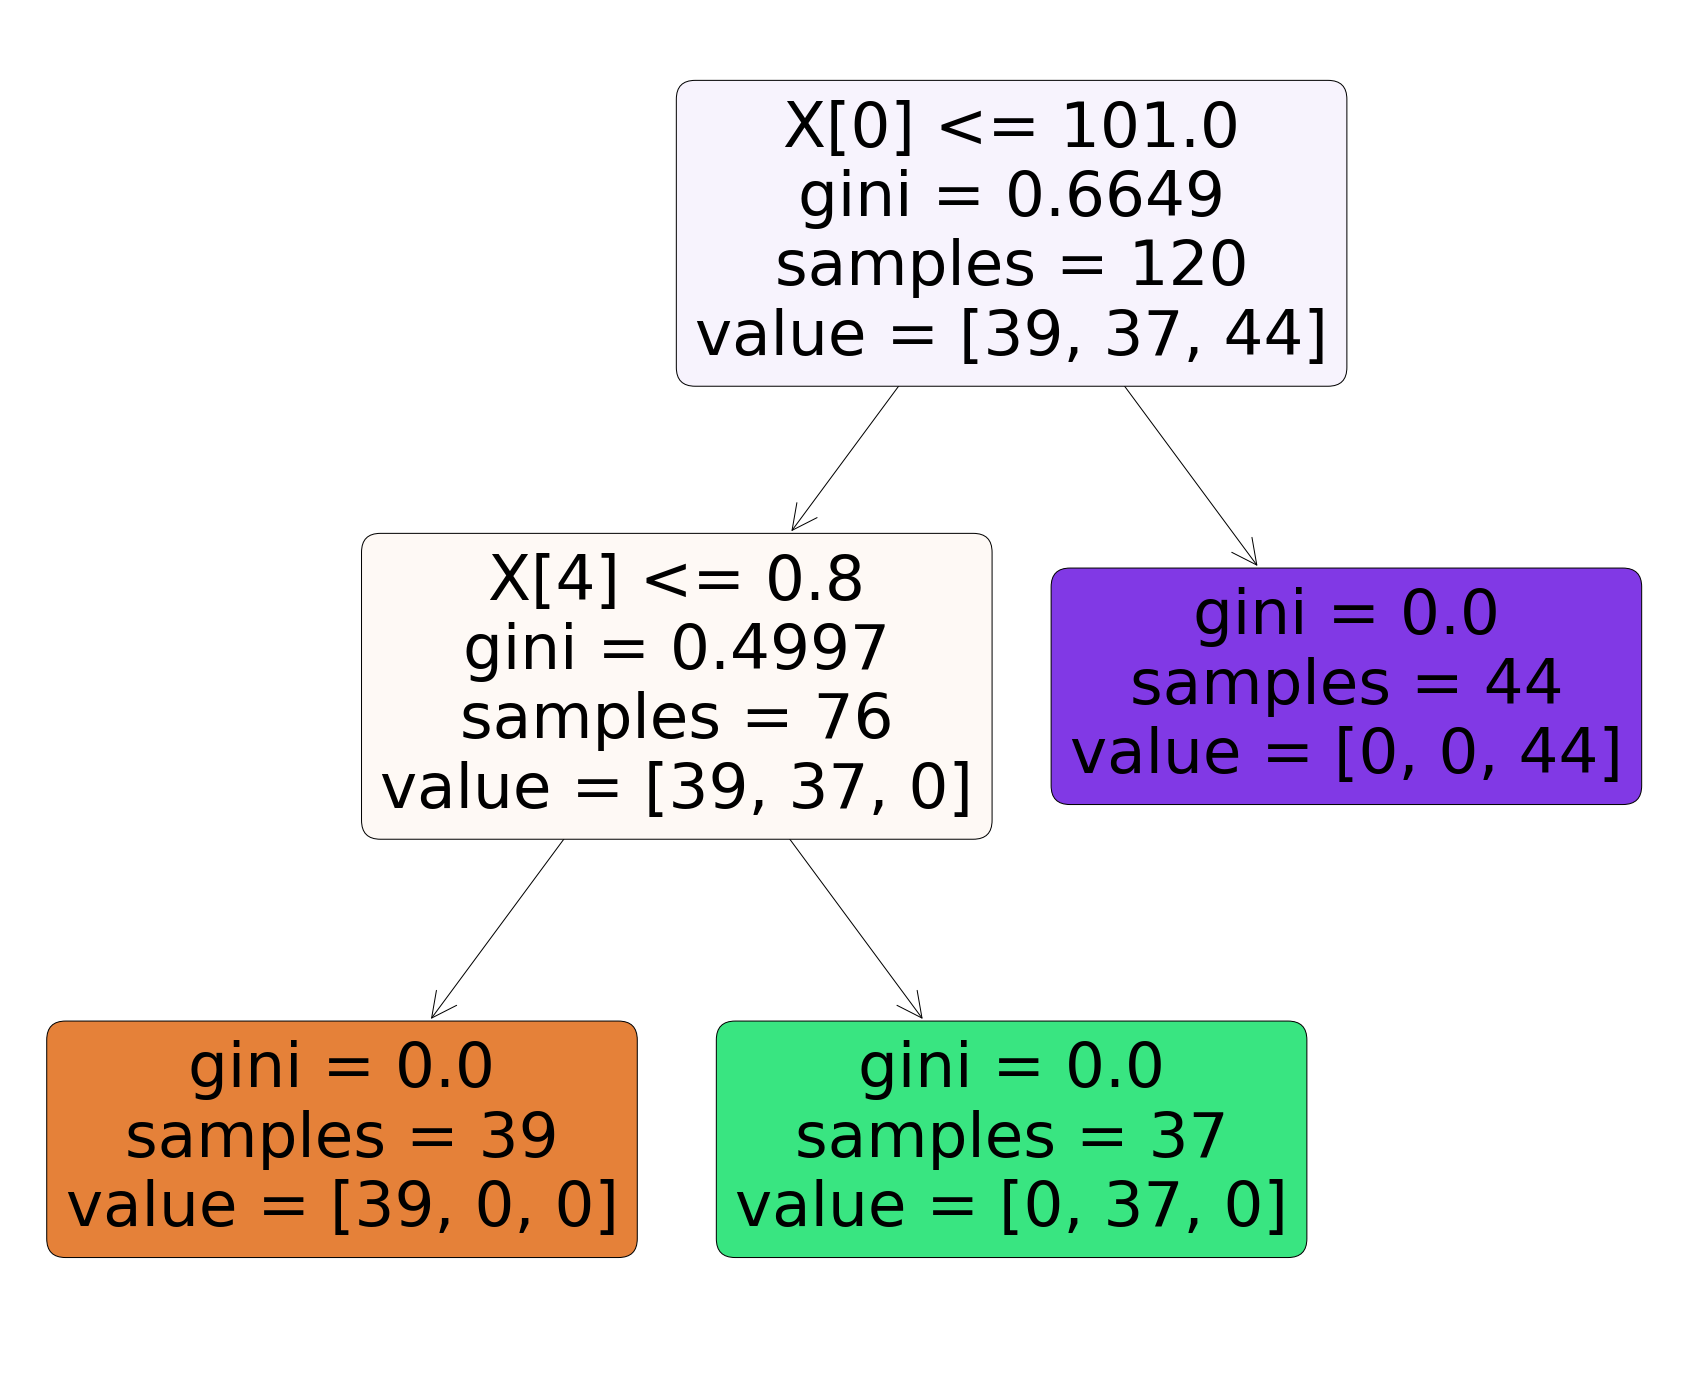

In [20]:
from sklearn import tree
names=['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
cnames=['Iris-setosa','Iris-versicolor','Iris-virginica']
fig=plt.figure(figsize=(30,25))
tree.plot_tree(model,filled=True ,precision=4,rounded=True)

### Evaluating Model

Accuracy is- 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



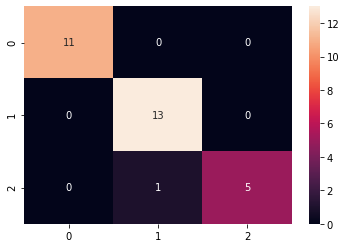

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(ytest,ypred)
print('Accuracy is-', acc)
cm= confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print(classification_report(ytest,ypred))

#### According to the classification report we can conclude that the values of precision, recall and f1-score are above 0.83 the model is predicted well.